# Band Gap Prediction of Inorganic materials

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNetCV, BayesianRidge
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score, make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train_data = pd.read_csv('train_X.csv')
y_train_data = pd.read_csv('train_y.csv')
x_test_data = pd.read_csv('test_X.csv')

x_train_data.head(10)

,Material,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D124,D125,D126,D127,D128,D129,D130,D131,D132,Id
0,O4V1Y1,8,39,31,15.6667,10.22220,8,12,87,75,...,0.0,0.0,0.0,12,229,217,78.500,88.6667,12,8683
1,Al1Ba2Cu2F11,9,56,47,17.6250,12.43750,9,9,93,84,...,0.0,0.0,0.0,15,229,214,81.125,90.9219,15,8788
2,Li2O2Pd1,3,46,43,13.6000,12.96000,3,1,87,86,...,0.0,0.0,0.0,12,229,217,141.400,103.5200,12,5144
3,Br2Cl2Cu1Rb2,17,37,20,29.5714,7.34694,17,4,95,91,...,0.0,0.0,0.0,64,229,165,134.143,80.1633,64,9593
4,Al1K1O2,8,19,11,12.0000,4.00000,8,3,87,84,...,0.0,0.0,0.0,12,229,217,119.500,107.5000,12,2027
5,Br4Rb2Zn1,30,37,7,34.8571,1.38776,35,4,95,91,...,0.0,0.0,0.0,64,229,165,129.714,75.1020,64,12996
6,B1O3V1,5,23,18,10.4000,5.04000,8,46,87,41,...,0.0,0.0,0.0,12,229,217,86.200,89.0400,12,4653
7,C3O2,6,8,2,6.8000,0.96000,6,77,87,10,...,0.0,0.0,0.0,12,194,182,121.200,87.3600,194,9758
8,Cu1Mg1P1,12,29,17,18.6667,6.88889,12,64,83,19,...,0.0,0.0,0.0,2,225,223,140.333,92.2222,2,5078
9,K1P1Zn1,15,30,15,21.3333,5.77778,15,3,83,80,...,0.0,0.0,0.0,2,229,227,141.667,93.1111,2,4146


In [ ]:
y_train_data.head(10)

,Egap,Id
0,2.8121,8683
1,2.5128,8788
2,1.9510,5144
3,1.0099,9593
4,2.9344,2027
5,3.7766,12996
6,1.4328,4653
7,3.9189,9758
8,0.1823,5078
9,0.9864,4146


Since I know the y_sample submission is formatted 'ID' column first, and then Egap, I am going to switch them here. I found that there is pandas function that does this for me.

In [ ]:
columns_titles = ["Id","Egap"]
y_train_data=y_train_data.reindex(columns=columns_titles)
y_train_data.head(10)

,Id,Egap
0,8683,2.8121
1,8788,2.5128
2,5144,1.9510
3,9593,1.0099
4,2027,2.9344
5,12996,3.7766
6,4653,1.4328
7,9758,3.9189
8,5078,0.1823
9,4146,0.9864


# Data Cleaning


More just like organizing things. I know that we won't have to do EDA or remove null values for this data set so we can skip those. We already switched the columns for y_train the ID column and Egap column to fit the format, so one step is done.

I know by looking at x_train_data set, that the material column won't help us in actual analysis, so let's just work with the properties D1-D130. We can also save the ID column for both x_train and y_train and add them back later, so we can just use numbers simply.

In [ ]:
x = x_train_data[x_train_data.columns[1:-1]]
y = y_train_data[y_train_data.columns[1:]]
ID = x_test_data[x_test_data.columns[-1]]
x_test = x_test_data[x_test_data.columns[1:-1]]

In [ ]:
x.head(10)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D123,D124,D125,D126,D127,D128,D129,D130,D131,D132
0,8,39,31,15.6667,10.22220,8,12,87,75,67.6667,...,0.0,0.0,0.0,0.0,12,229,217,78.500,88.6667,12
1,9,56,47,17.6250,12.43750,9,9,93,84,77.6250,...,0.0,0.0,0.0,0.0,15,229,214,81.125,90.9219,15
2,3,46,43,13.6000,12.96000,3,1,87,86,47.6000,...,0.0,0.0,0.0,0.0,12,229,217,141.400,103.5200,12
3,17,37,20,29.5714,7.34694,17,4,95,91,64.2857,...,0.0,0.0,0.0,0.0,64,229,165,134.143,80.1633,64
4,8,19,11,12.0000,4.00000,8,3,87,84,62.5000,...,0.0,0.0,0.0,0.0,12,229,217,119.500,107.5000,12
5,30,37,7,34.8571,1.38776,35,4,95,91,65.2857,...,0.0,0.0,0.0,0.0,64,229,165,129.714,75.1020,64
6,5,23,18,10.4000,5.04000,8,46,87,41,75.8000,...,0.0,0.0,0.0,0.0,12,229,217,86.200,89.0400,12
7,6,8,2,6.8000,0.96000,6,77,87,10,81.0000,...,0.0,0.0,0.0,0.0,12,194,182,121.200,87.3600,194
8,12,29,17,18.6667,6.88889,12,64,83,19,71.6667,...,0.0,0.0,0.0,0.0,2,225,223,140.333,92.2222,2
9,15,30,15,21.3333,5.77778,15,3,83,80,51.6667,...,0.0,0.0,0.0,0.0,2,229,227,141.667,93.1111,2


In [ ]:
y.head(10)

,Egap
0,2.8121
1,2.5128
2,1.9510
3,1.0099
4,2.9344
5,3.7766
6,1.4328
7,3.9189
8,0.1823
9,0.9864


In [ ]:
ID.head(10)

0    13062
1      587
2     2333
3     7740
4     9463
5     5652
6     8999
7    11427
8     3677
9     2200
Name: Id, dtype: int64

In [ ]:
x_test.head(10)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D123,D124,D125,D126,D127,D128,D129,D130,D131,D132
0,6,79,73,23.66670,22.8889,6,4,82,78,64.6667,...,0.0,0.0,0.0,0.0,194,229,35,205.000,14.66670,194
1,6,11,5,7.00000,1.0000,6,2,82,80,69.5000,...,0.0,0.0,0.0,0.0,194,229,35,198.375,7.65625,194
2,6,6,0,6.00000,0.0000,6,77,77,0,77.0000,...,0.0,0.0,0.0,0.0,194,194,0,194.000,0.00000,194
3,1,16,15,10.00000,4.4000,9,83,93,10,89.8000,...,0.0,0.0,0.0,0.0,2,194,192,59.200,58.24000,15
4,6,56,50,22.66670,22.2222,6,9,77,68,54.3333,...,0.0,0.0,0.0,0.0,194,229,35,205.667,15.55560,194
5,37,52,15,45.00000,7.0000,52,4,90,86,53.6667,...,0.0,0.0,0.0,0.0,152,229,77,184.667,32.66670,152
6,15,55,40,27.00000,16.8000,15,5,83,78,59.6000,...,0.0,0.0,0.0,0.0,2,229,227,70.100,95.34000,2
7,1,12,11,2.72727,2.5124,1,68,92,24,86.1818,...,0.0,0.0,0.0,0.0,166,194,28,188.909,8.33058,194
8,1,48,47,13.20000,13.9200,1,70,92,22,85.6000,...,0.0,0.0,0.0,0.0,12,194,182,121.200,87.36000,12
9,34,92,58,55.75000,27.1875,34,20,89,69,63.1250,...,0.0,0.0,0.0,0.0,14,63,49,32.375,22.96880,14


In [ ]:
# changing it to ravel to use it for our analysis
y = y.values.ravel()

Let's split the data here. I always found that depending on random seed state, the accuracy might differ, so I will be taking notes on which would be the best.

In [ ]:
np.random.seed(14)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=14)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)


# Linear Models

Now, I am going to first use numbers of Linear models we learned in class and try to predict and see how those models perform. I am first going to choose the general parameters for those models, and then if I find the one that performs well among others, then I will go into that model and do parameter tuning, or else I would have to do parameter tuning and grid search on every single model and compare.

Note here that I took out Logistic Regression, because logistic regression was specifically designed for classification problems, and output will only be 0 and 1. Also for the metric, instead of F1 score that we used before, we are going to mean squared error, since this is not a classification problem.

In [ ]:
models = [
    #('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=10.0)),  # adjust the alpha parameter
    ('LASSO', Lasso(alpha=10.0)),  # adjust the alpha parameter
    ('Elastic Net', ElasticNetCV(alphas=[0.1, 1.0, 10.0], l1_ratio=[0.1, 0.5, 0.9], cv=5))
]

In [ ]:
# Train and compare the models
best_model = None
best_mse_score = 10.0
best_r2_score = 0.0

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)

    # Round the predicted values
    # y_pred = np.round(y_pred)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_val, y_pred)

    # Calculate R-Squared value
    r2 = r2_score(y_val, y_pred)

    # Print results
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print()

    # Update best model based on MSE, smaller the MSE it is better, opposed to accuracy
    if mse < best_mse_score and r2 > best_r2_score:
        best_mse_score = mse
        best_r2_score = r2
        best_linear_model = model


print(f"Best Model (based on F1 Score): {best_linear_model}")
print(f"Best MSE Score: {best_mse_score}")
print(f"Best R-squared Score: {best_r2_score}")

Model: Linear Regression
Mean Squared Error: 1.1494237691896099
R-squared: 0.535172131044811

Model: Ridge Regression
Mean Squared Error: 1.140584941769229
R-squared: 0.5387465597490086

Model: LASSO
Mean Squared Error: 2.472803104268153
R-squared: -3.5044630530833842e-06

Model: Elastic Net
Mean Squared Error: 1.205854981417612
R-squared: 0.5123513047963735

Best Model (based on F1 Score): Ridge(alpha=10.0)
Best MSE Score: 1.140584941769229
Best R-squared Score: 0.5387465597490086


Okay, so it doesn't look too great using linear methods on this data set. We found that Ridge using alpha = 10.0, again this was generic choice just to compare with others, is the best model so far among linear models, with MSE 1.19 and R-squared value of 0.518, which is not the best. I could run the gridsearch just to find the best hyper parameter for this model, but I honestly think it wouldn't be too helpful than actually finding another model itself that would perform better. The purpose of this assignment was also to focus on the model engineering and finding the best model, so I will go ahead and find the best model, not try to make our bad model with Ridge better, with hyper parameter, for now. Who knows, maybe non linear methods won't perform better, then I will come back and do hyperparameter tuning on this.

# Non Linear Methods


Let's try non linear methods. I have added more models that I found online while researching that might be most useful for us. I added the linear regression on top just so I can compare with others.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from scipy.optimize import curve_fit

# Function to fit models that are not in scikit-learn
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

def exponential(x, a, b):
    return a * np.exp(b * x)

def logarithmic(x, a, b):
    return a + b * np.log(x)

def power_law(x, a, b):
    return a * np.power(x, b)

# Define models
nonlinmodels = [
    ('Ridge Regression', Ridge(alpha=10.0)), # just to compare with others
    #('Polynomial Regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    #('Exponential Regression', exponential),
    #('Logarithmic Regression', logarithmic),
    #('Power Law Regression', power_law),
    #('Sigmoidal (Logistic) Regression', sigmoid),
    #('Gaussian Process Regression', GaussianProcessRegressor(kernel=C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)))),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regression', GradientBoostingRegressor()),
    ('Support Vector Regression', SVR(kernel='rbf')),
]

# Fit models and evaluate performance
best_model = None
best_mse = 10.0
best_r2 = 0.0

for name, models in nonlinmodels:
    if callable(models):
        # For custom models (exponential, logarithmic, sigmoidal), use curve_fit
        # The custom models that I made were all not working even after hours of trying to fix them, so I just decided not to use them.
        # The function below still has components of it, because I didn't want to mess up the code too much, but you can see what I was trying to do
        if models == exponential:
            initial_params = [1.0, 0.1] #adjust parameters
            popt, _ = curve_fit(model, x_train.values.T, y_train, p0=initial_params) #x_train.values.flatten()
            y_pred = model(x_val.values.T, *popt)
        else:
          popt, _ = curve_fit(models, x_train, y_train) #x_train.flatten()
          y_pred = models(x_val, *popt) #x_val.flatten()
    else:
        # For scikit-learn models
        models.fit(x_train, y_train)
        y_pred = models.predict(x_val)

    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}\n")

    # Update best model if necessary
    if mse < best_mse and r2 > best_r2:
        best_nonlin_model = models
        best_mse = mse
        best_r2 = r2

print(f"Best Model: {best_nonlin_model}")
print(f"Best Mean Squared Error: {best_mse}")
print(f"Best R-squared: {best_r2}")


Model: Ridge Regression
Mean Squared Error: 1.140584941769229
R-squared: 0.5387465597490086

Model: Random Forest Regression
Mean Squared Error: 0.6246020542014703
R-squared: 0.7474104420128714

Model: Gradient Boosting Regression
Mean Squared Error: 0.8213731328949803
R-squared: 0.6678360642830596

Model: Support Vector Regression
Mean Squared Error: 0.8315090136847155
R-squared: 0.6637371061844306

Best Model: RandomForestRegressor()
Best Mean Squared Error: 0.6246020542014703
Best R-squared: 0.7474104420128714


Seems like our Random Forest Model did the best so far. But MSE of 0.624 and R-squared of 0.747 still doesn't sound like the best. Let's try to do hyper parameter tuning for this model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Define the Random Forest model
rf_model = RandomForestRegressor()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [750, 800, 850, 900], # most commonly used are in range of 100 to 1000
    'max_depth': [None, 10, 20, 30], # most commonly used are in range of 10 to 30
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.5, None],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error'],
    'max_samples': [0.5, 0.8, 1.0]
    # Add other hyperparameters to tune
}

# Define the scoring metric (negative mean squared error in this case)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create the GridSearchCV object
grid_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=10, scoring=scorer, cv=5, error_score='raise', random_state=14, verbose=2)
# changed scoring metric to neg mean squared error, and added error+score = raise to fix the error

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train) # Use ravel() to convert y_train to a 1D array and fix error

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Best RF model", best_rf_model)
print("Best RF model MSE", mse)
print("Best RF model R-squared", r2)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................................n_estimators=300; total time=  29.1s
[CV] END ...................................n_estimators=300; total time=  29.3s
[CV] END ...................................n_estimators=300; total time=  29.0s
[CV] END ...................................n_estimators=300; total time=  29.7s
[CV] END ...................................n_estimators=300; total time=  28.9s
[CV] END ...................................n_estimators=400; total time=  38.4s
[CV] END ...................................n_estimators=400; total time=  39.0s
[CV] END ...................................n_estimators=400; total time=  38.9s
[CV] END ...................................n_estimators=400; total time=  38.2s
[CV] END ...................................n_estimators=400; total time=  37.6s
[CV] END ...................................n_estimators=500; total time=  46.4s
[CV] END ...................................n_est

Okay, so with best hyper parameters, I wouldn't say that is an improvement. The code was taking so long for gridsearch, so I tried random search instead, I wonder if that is why. Still seems like A LOT of difference from others. I wonder how others got such low MSE score.

I wasn't going to use Neural Network, but it really seems like everyone else is getting incredible MSE score and I am almost double them. so I am going to see if my NN can do better than at least above result.

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name() #checking if it is running on GPU

''

In [ ]:
!pip install light-the-torch >> /.tmp
!ltt install torch torchvision >> /.tmp
!pip install fastai --upgrade >> /.tmp
# Google colab kept telling me I am not using GPU even when I have set GPU as runtime processor, so I wanted to run this just in case.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, make_scorer

# Define the MLPRegressor model
mlp_model = MLPRegressor(random_state=14)

# Define the hyperparameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'logistic', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500, 1000, 1500],
}

# Define the scoring metric (negative mean squared error in this case)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create the GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid, scoring=scorer, cv=5, error_score='raise', verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_mlp_model.predict(x_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print results
print("Best MLP model MSE:", mse)
print("Best MLP model R-squared:", r2)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=   3.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=   3.5s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=   7.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=   3.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=   4.0s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=   4.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=   6.8s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=   9.6s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=   6.3s
[CV] END activation=relu, alpha=0.0001, hi

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=   5.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=  14.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=  16.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=  14.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=  14.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1500; total time=  15.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1500; total time=  14.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1500; total time=  15.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1500; total time=  19.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1500; total time=  23.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=500; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=500; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=500; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=500; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=500; total time=  14.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000; total time=  17.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000; total time=  16.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000; total time=  31.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000; total time=  19.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000; total time=  19.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1500; total time=  19.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1500; total time=  21.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1500; total time=  19.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=500; total time=  18.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=500; total time=  12.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=500; total time=  15.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=500; total time=  14.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=500; total time=  14.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  16.6s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  30.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  21.8s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  25.2s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  13.3s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1500; total time=  18.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1500; total time=  14.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1500; total time=  15.8s
[CV] END activation=logistic, alpha=0.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=500; total time=  19.0s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  15.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  19.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  17.9s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  12.5s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  22.1s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1500; total time=  14.7s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1500; total time=  18.4s
[CV] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100, 100), max_iter=1500; total time=  16.1s
[CV] END activation=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=500; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=500; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=500; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=500; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=500; total time=   9.1s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1000; total time=  14.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1000; total time=  22.8s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1000; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1000; total time=  15.3s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1000; total time=  14.6s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1500; total time=  14.9s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1500; total time=  20.4s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1500; total time=  21.3s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1500; total time=  18.9s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1500; total time=  16.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=500; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=500; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=500; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=500; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=500; total time=  11.2s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1000; total time=  19.3s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1000; total time=  22.2s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1000; total time=  17.8s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1000; total time=  17.9s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1000; total time=  22.7s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1500; total time=  16.0s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1500; total time=  16.2s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), max_iter=1500; total time=  17.8s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=500; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=500; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=500; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=500; total time=  11.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=500; total time=   9.4s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  33.8s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  18.3s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  13.2s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  27.1s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  11.3s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=1500; total time=  14.6s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=1500; total time=  13.6s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=1500; total time=  12.5s
[CV] END activation=logistic, alpha=0.001, hidd

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=500; total time=  18.9s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  13.7s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  19.2s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  15.1s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  12.2s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  20.0s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1500; total time=  13.9s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1500; total time=  17.5s
[CV] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 100), max_iter=1500; total time=  15.5s
[CV] END activation=logistic,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=500; total time=   8.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=500; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=500; total time=   8.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=500; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=500; total time=   8.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1000; total time=  14.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1000; total time=  14.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1000; total time=  14.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1000; total time=  14.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1000; total time=  10.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1500; total time=  14.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1500; total time=  15.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1500; total time=  14.5s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1500; total time=  15.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1500; total time=  12.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=500; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=500; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=500; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=500; total time=  11.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=500; total time=  11.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000; total time=  16.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000; total time=  16.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000; total time=  15.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000; total time=  15.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1000; total time=  17.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1500; total time=  17.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1500; total time=  17.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_iter=1500; total time=  15.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), max_i

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=500; total time=  11.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=500; total time=   8.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=500; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=500; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=500; total time=  11.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  14.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  12.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  13.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  15.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=1000; total time=  11.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=1500; total time=  14.4s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=1500; total time=  13.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=1500; total time=  13.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=500; total time=  21.8s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=500; total time=  17.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  14.2s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  17.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  17.0s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  22.7s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=1000; total time=  17.1s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=1500; total time=  13.6s
[CV] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 100), max_iter=1500; total time=  17.3s
[CV] END activation=logistic, alpha=0.0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=  10.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=   6.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=500; total time=   9.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=  11.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=   6.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=  10.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=  11.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1000; total time=  12.1s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1500; total time=   8.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1500; total time=   8.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1500; total time=   8.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), max_iter=1500; total time=  10.4s
[

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=500; total time=  17.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=500; total time=  16.3s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000; total time=   8.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000; total time=  13.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000; total time=  12.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000; total time=  16.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1000; total time=  15.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1500; total time=  11.2s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1500; total time=  12.9s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), max_iter=1500; total time=

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=500; total time=  11.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=500; total time=   7.5s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=500; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=500; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=500; total time=   9.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1000; total time=   9.8s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1000; total time=   9.0s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1000; total time=   7.9s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1000; total time=  11.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1000; total time=  12.1s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1500; total time=  11.2s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1500; total time=   6.3s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1500; total time=  10.4s
[CV] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50,), max_iter=1500; total time=   9.9s
[CV] END ac

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), max_iter=500; total time=  11.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), max_iter=500; total time=  11.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1000; total time=   6.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1000; total time=   8.7s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1000; total time=   7.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1000; total time=  11.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1000; total time=  12.0s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1500; total time=   5.9s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1500; total time=   9.2s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1500; total time=   9.5s
[CV] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), max_iter=1500; total time=   9.7s
[CV] END activation=t

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Wow, after like two hours of running hyper parameter tuning, I am at 1.03768 MSE and 0.58178 R-squared. Not best. Let me actually make models myself and see how it does.

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU

from tensorflow.keras.losses import mean_squared_error

from tensorflow.keras.optimizers import Adam

import random

In [ ]:
random.seed(14)
tf.random.set_seed(14)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.001, random_state=14)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)


#X_train = x_train.reshape(x_train.shape[], 32, 32, 1)
#X_test = x_val.reshape(x_val.shape[], 32, 32, 1)
#X_train = X_train / 255.0
#X_test = X_test / 255.0



model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation = 'linear'))

# Compile the model
model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.001), metrics = ['mean_squared_error'])



In [ ]:
nn_model = model.fit(x_train, y_train, epochs=30, batch_size=1024, validation_data=(x_val, y_val), verbose=1)

y_pred = model.predict(x_val)
mse_nn = mean_squared_error(y_val.T, y_pred)
overall_mse_nn = np.mean(mse_nn) #idk why but the above line worked for every single model, but for this one it gave me every single element difference, so I had to add this line

r2_nn = r2_score(y_val, y_pred)

print("Neural Network Regression")
print(f"Mean Squared Error: {overall_mse_nn}")
print(f"R-squared: {r2_nn}\n")

Epoch 1/30
10/10 [==============================] - 14s 1s/step - loss: 9.6887 - mean_squared_error: 9.6887 - val_loss: 8.3691 - val_mean_squared_error: 8.3691
Epoch 2/30
10/10 [==============================] - 12s 1s/step - loss: 5.1493 - mean_squared_error: 5.1493 - val_loss: 2.5296 - val_mean_squared_error: 2.5296
Epoch 3/30
10/10 [==============================] - 10s 985ms/step - loss: 1.7437 - mean_squared_error: 1.7437 - val_loss: 2.1997 - val_mean_squared_error: 2.1997
Epoch 4/30
10/10 [==============================] - 11s 1s/step - loss: 1.3166 - mean_squared_error: 1.3166 - val_loss: 1.2015 - val_mean_squared_error: 1.2015
Epoch 5/30
10/10 [==============================] - 11s 1s/step - loss: 1.1083 - mean_squared_error: 1.1083 - val_loss: 0.9763 - val_mean_squared_error: 0.9763
Epoch 6/30
10/10 [==============================] - 11s 1s/step - loss: 1.0257 - mean_squared_error: 1.0257 - val_loss: 0.7923 - val_mean_squared_error: 0.7923
Epoch 7/30
10/10 [===================

In [ ]:
print(y_val[:10])

[0.5931 6.8304 1.9915 3.6904 3.1902 1.6664 1.6269 2.121  1.3687 2.2024]


In [ ]:
print(y_pred[:10, :].T)

[[2.5535884 6.6014676 1.864155  4.234812  3.682961  1.3218606 1.8279066
  1.7219428 2.5928597 1.8379807]]


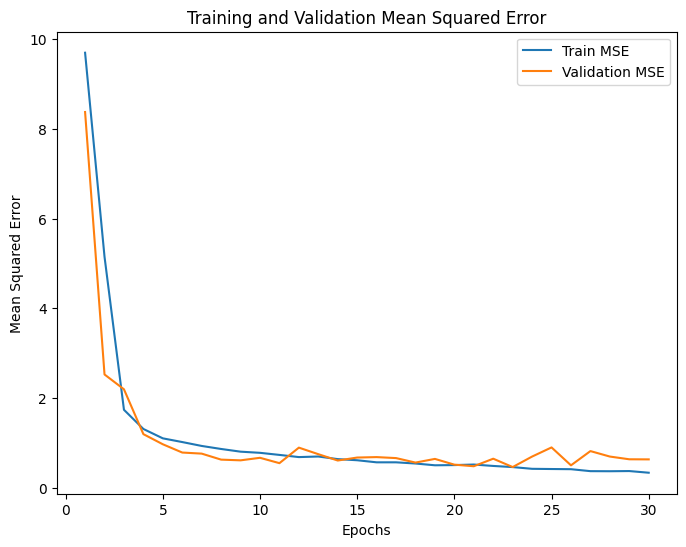

In [ ]:
import matplotlib.pyplot as plt

train_mse = nn_model.history['mean_squared_error']
val_mse = nn_model.history['val_mean_squared_error']

# Plot the training and validation MSE
epochs = range(1, len(train_mse) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_mse, label='Train MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.title('Training and Validation Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


Okay, that does look like it is better than the previous methods. Not sure if my mean squared error is correct here though, it looks way too small. It says its around mean squared error of 1 later on, but that is not what i got on leaderboard also.

# File Output


Let's output the excel files. First, let's output our neural network file that did the best.

In [ ]:
# x_test data should already be loaded
x_test_scaled = scaler.transform(x_test)  # Scale the test data using the same scalers

# Make predictions on the test data
y_test_pred = model.predict(x_test_scaled)

# Create a DataFrame with the predicted labels
ID = x_test_data[x_test_data.columns[-1]]
ID_df = pd.DataFrame({'Id': ID})
result_df = pd.DataFrame({'Egap': y_test_pred.ravel()}) #had to add ravel since y_test_pred shape was (4132,1)
combined_df = pd.concat([ID_df, result_df], axis=1)

# Save the results to a CSV file (replace 'results.csv' with your desired file name)
combined_df.to_csv('nn_results.csv', index=False)


130/130 [==============================] - 3s 20ms/step


I am also going to output the best linear and non linear models that we found using hyperparameter tuning, just to see how they do on the leaderboard.

In [ ]:
# x_test data should already be loaded, and scaled

# Make predictions on the test data
y_test_pred = best_linear_model.predict(x_test_scaled)

# Create a DataFrame with the predicted labels
ID = x_test_data[x_test_data.columns[-1]]
ID_df = pd.DataFrame({'Id': ID})
result_df = pd.DataFrame({'Egap': y_test_pred})
combined_df = pd.concat([ID, result_df], axis=1)

# Save the results to a CSV file (replace 'results.csv' with your desired file name)
combined_df.to_csv('linear_results.csv', index=False)


In [ ]:
# x_test data should already be loaded, and scaled

# Make predictions on the test data
y_test_pred = best_nonlin_model.predict(x_test_scaled)

# Create a DataFrame with the predicted labels
ID = x_test_data[x_test_data.columns[-1]]
ID_df = pd.DataFrame({'Id': ID})
result_df = pd.DataFrame({'Egap': y_test_pred})
combined_df = pd.concat([ID, result_df], axis=1)

# Save the results to a CSV file (replace 'results.csv' with your desired file name)
combined_df.to_csv('nonlinear_results.csv', index=False)


I guess I could just keep trying more and more hyper parameters and trying to improve the MSE on leaderboard, but it took me so long to get here, and with so many parameters, both gridsearch and randomsearch takes so long like hours, that I decided it is good to cut here. I may try some late submissions just to see how some other methods do after playing around with other parameters.